# Distribuciones de probabilidad 

Una **distribución de probabilidad** es una función que relaciona los valores posibles de una Variable Aleatoria (VA) con sus respectivas probabilidades de ocurrir. En general hacemos la distinción entre 

Función de masa de probabilidad (FMP)
: Nombre que recibe la distribución de una VA de dominio discreto (ordinal o categórica). Si $p_X(x)$ es una PMF entonces $p_X(x) \in [0, 1] \forall x$ y  $\sum_{x} p_X(x) = 1$

Función de densidad de probabilidad (FDP)
: Nombre que recibe la distribución de una VA de dominio continuo. Si $f_X(x)$ es una PDF entonces $f_X(x) \geq 0$ y $\int f_X(x) \,dx = 1$ 


Utilizando la FMP/FDP de una VA podemos calcular la probabilidad de un evento. Por ejemplo, sea una VA discreta $X$ cuya PMF es $p_X(\cdot)$. Si $a$ es parte de su dominio puedo calcular la probabilidad de ocurrencia de $a$ como

$$
P(X = a) = p_X(a)
$$

Sea ahora una VA continua $Y$ cuya PDF es $f_Y(\cdot)$. Si $b$ es parte de su dominio no es posible calcular si probabilidad, pues es infinitesimal. Sin embargo podemos calcular la probabilidad para un rango como

$$
P(a < Y < b) = \int_{a}^{b} f_Y(x) \,dx = F_Y(b) - F_Y(a)
$$

donde $F_Y()$ se conoce como la **función de densidad acumulada**


## Distribuciones comunes con scipy

El estudio del los fenómenos y procesos aleatorios ha traido consigo el descubrimiento de una gran lista de distribuciones de probabilidad.

La siguiente tabla presenta algunas de las distribuciones más comunes con ejemplos de los fenomenos que buscan modelar


| Distribución | Fenómeno que representa | Ejemplo |
| --- | --- | --- |
| **Bernoulli** | Evento binario  | Lanzamiento de una moneda |
| **Binomial** | Multiples eventos binarios independientes | |
| **Categórica** | Evento con $k$ valores posibles | Lanzamiento de un dado, Ruleta |
| **Poisson** | Conteo de eventos ocurridos en un período de tiempo | Cantidad de alumnos que llegan entre 9:50 y 10:00| 
| **Exponencial** | Valor continuo positivo | Tiempo de espera entre eventos|
| **Gamma** | Valor continuo positivo | Tiempos de espera hasta que ocurren $n$ eventos|
| **Beta** | Valor continuo en $[0, 1]$ |  Tiempo para completar una tarea, proporciones|
| **Normal/Gaussiana** | Valor continuo ubicado en la vecindad de un valor central| [Demasiados](https://galtonboard.com/probabilityexamplesinlife)|
| **Uniforme** | Valor acotado a un rango, todos con igual probabilidad de ocurrencia| |


:::{tip

Familiarizarse con la forma de estas distribuciones nos facilitará la tarea de proponer modelos para nuestros datos

:::

A continuación utilizaremos scipy para visualizar algunas de estas distribuciones

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

Una gran número de distribuciones teóricas se encuentran implementadas en el módulo `stats` de scipy. Los constructores de las distribuciones disponibles se pueden encontrar divididos en tres grupos:

- [discretas](https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions): Distribuciones univariadas con soporte binario, entero o categórico
- [continuas](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions): Distribuciones univariadas con soporte en los números reales
- [multivariada](https://docs.scipy.org/doc/scipy/reference/stats.html#multivariate-distributions)

Por ejemplo para crear una distribución Normal/Gaussiana con media cero y desviación estándar uno:

In [2]:
dist = scipy.stats.norm(loc=0, scale=1)
dist

Los objetos de tipo distribución comparten algunos métodos, entre ellos:

- `pdf`/`pmf(x)`: Retorna la función de densidad/masa de probabilidad evaluada en $x$
- `cdf(x)`: Retorna la función de densidad/masa acumulada evaluada en $x$
- `ppf(p)`: Retorna  el inverso de la distribución acumulada
- `rvs(size=100)`: Retorna $100$ muestras a partir de la distribución


A continuación vermos algunas FDP/FMP de distribuciones comunes

Partiendo por tres distribuciones con soporte en los números reales

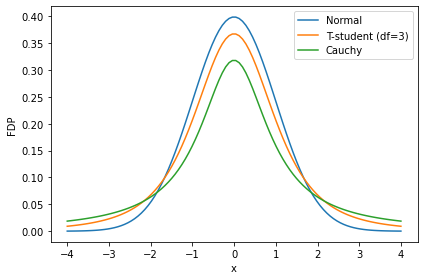

In [3]:
x = np.linspace(-4, 4, num=100)
pdf = dist.pdf(x)

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(x, scipy.stats.norm(loc=0, scale=1).pdf(x), label='Normal')
ax.plot(x, scipy.stats.t(df=3, loc=0, scale=1).pdf(x), label='T-student (df=3)')
ax.plot(x, scipy.stats.cauchy(loc=0, scale=1).pdf(x), label='Cauchy')


ax.set_ylabel('FDP')
ax.set_xlabel('x')
ax.legend();

:::{note}

Las tres distribuciones son simétricas, pero difieren en el comportamiento de sus colas. La distribución de Cauchy tiene las colas más pesadas y la normal las más ligeras

:::


La distribución de Bernoulli tiene soporte binario 

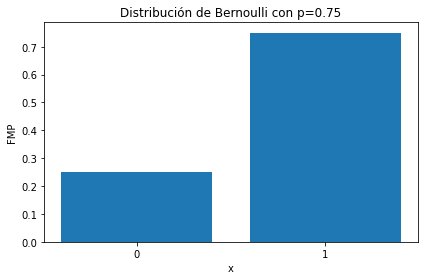

In [4]:
dist = scipy.stats.bernoulli(p=0.75)

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.bar([0, 1], dist.pmf([0, 1]))

ax.set_xticks([0, 1])
ax.set_ylabel('FMP')
ax.set_xlabel('x');
ax.set_title(f'Distribución de Bernoulli con p={0.75}');

La distribución de Poisson tiene soporte en los números naturales más el cero

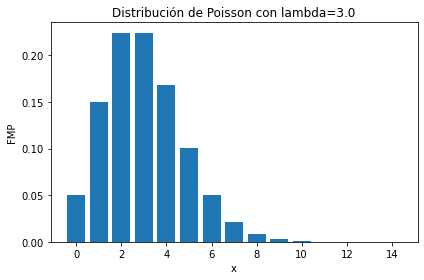

In [5]:
x = np.arange(0, 15, step=1)
dist = scipy.stats.poisson(mu=3.)

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.bar(x, dist.pmf(x))
ax.set_ylabel('FMP')
ax.set_xlabel('x');
ax.set_title(f'Distribución de Poisson con lambda={3.}');

La distribución Beta tiene soporte en el rango $[0, 1]$ de los números reales

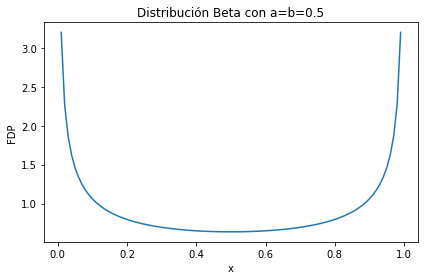

In [6]:
x = np.arange(0, 1, step=0.01)
dist = scipy.stats.beta(a=0.5, b=0.5)

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(x, dist.pdf(x))
ax.set_ylabel('FDP')
ax.set_xlabel('x');
ax.set_title(f'Distribución Beta con a=b={0.5}');

Las distribuciones Gamma, Log-Normal y Chi cuadrado tienen soporte en los números reales no-negativos

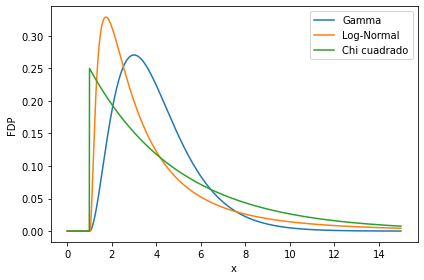

In [7]:
x = np.arange(0, 15, step=0.01)

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(x, scipy.stats.gamma(a=3, loc=1, scale=1).pdf(x), label='Gamma')
ax.plot(x, scipy.stats.lognorm(s=1, loc=1, scale=2).pdf(x), label='Log-Normal')
ax.plot(x, scipy.stats.chi2(df=2, loc=1, scale=2).pdf(x), label='Chi cuadrado')
ax.set_ylabel('FDP')
ax.set_xlabel('x')
ax.legend();

:::{note}

Cuando una variable $X$ tiene distribución log-normal significa que $Y=\log(X)$ se distribuye normal

:::

La distribución uniforme tiene rango en los números reales en un rango determinado por sus parámetros

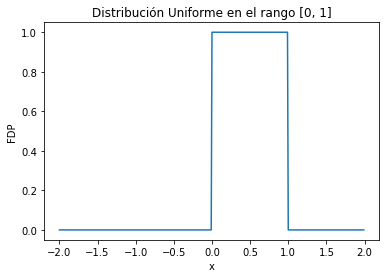

In [8]:
x = np.arange(-2, 2, step=0.01)
dist = scipy.stats.uniform(loc=0, scale=1)

fig, ax = plt.subplots()
ax.plot(x, dist.pdf(x))
ax.set_ylabel('FDP')
ax.set_xlabel('x');
ax.set_title(f'Distribución Uniforme en el rango [0, 1]');

:::{seealso}

El [zoológico de distribuciones](https://ben18785.shinyapps.io/distribution-zoo/) permite visualizar interactivamente la forma de las distribuciones más comunes

:::


## ¿Por qué la distribución Gaussiana es  tan común?

El siguiente sitio web muestra algunos ejemplos de la fenómenos que se distribuyen de forma Gaussiana: https://galtonboard.com/probabilityexamplesinlife 

> ¿Por qué esta distribución parece ser tan común? 

<img src="https://thumbs.gfycat.com/AggressiveAromaticBuckeyebutterfly-size_restricted.gif">


Para responder consideremos lo siguiente

**Ley de los grandes números**

Sean $X_1, X_2, \ldots, X_N$ V.A independientes e idénticamente distribuidas (iid) con media $\mu$. Se cumple que su promedio

$$
\bar X = \frac{1}{N} (X_1 + X_2 + \ldots + X_N)
$$

tiende a $\mu$ cuando $N \to \infty$

**Teorema central del límite**

Si $X_1, X_2, \ldots, X_N$ son V.A iid, entonces su promedio de distribuye como

$$
\bar X \sim \mathcal{N}(\mu, \sigma^2/N)
$$

Es decir que 

> El promedio (o suma) **se distribuye normal sin importar la distribución original** de las V.A. 

siempre y cuando las VA sean independientes. ¿Cúantos de los ejemplos del sitio web mencionado corresponden a sumas o promedios?

**Ejercicio formativo:** Sea una variable aleatoria que corresponde al lanzamiento de $n$ dados de seis caras. Lance los $n$ dados 1000 veces y muestre con la distribución del promedio de los $n$ dados. Considere $n=1, 2, 5, 10, 20, 50$

La distribución [multinomial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_multinomial) modela la ocurrencia de $n$ eventos cada uno con $k$ categorías. Se considera como una generalización de la distribución categórica ($n=1$) y de la binomial ($k=2$)

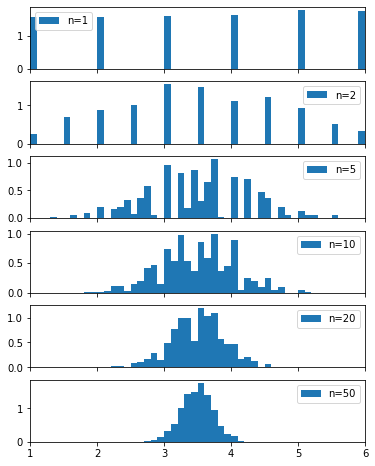

In [9]:
fig, ax = plt.subplots(6, figsize=(6, 8), sharex=True)
for n, ax_ in zip([1, 2, 5, 10, 20, 50], ax):
    dist = scipy.stats.multinomial(n=n, p=[1/6]*6)
    repeats = dist.rvs(size=1000)
    average_dice = np.sum(repeats*range(1, 7)/n, axis=1)
    ax_.hist(average_dice, bins=60, density=True, range=(0, 6), label=f"n={n}")
    ax_.legend()
ax_.set_xlim([1, 6]);

:::{important}

A medida que $n$ crece la distribución del promedio tiende a una normal, tal como lo predice el teorema central del límite

:::

Para mostrar las distribuciones se utilizó una herramienta gráfica llamada **histograma**. En la siguiente lección aprenderemos sobre ella